#Analisis de las tendencias en el mercado de aplicaciones de juegos móviles a lo largo del tiempo.

Objetivo:

- Analizar las características de las aplicaciones de juegos más populares en Google Play Store para identificar factores que contribuyen al éxito.
- Explorar las tendencias en el mercado de aplicaciones de juegos a lo largo del tiempo.


Dataset: [Top Games on Google Play Store](https://www.kaggle.com/dhruvildave/top-play-store-games)

__Información del dataset__

Este dataset contiene el top de videojuegos por cada categoría en Google Play Store, con información de las calificaciones y otros datos como precio y numero de instalaciones.

__Columnas__
- Rank: Posición del videojueo en una categoria en particular.
- Title: Nombre del videojuego.
- Total ratings: Número total de calificaciones.
- Installs: Número de instalaciones apróximado.
- Average rating: Calificación promedio hasta 5.
- Growth (30 days): Crecimiento porcentual en 30 días.
- Growth (60 days): Crecimiento porcentual en 60 días.
- Price: Precio en dolares.
- Category: Categoría del videojuego.
- 5 star ratings: Número de calificaciones de 5 estrellas.
- 4 star ratings: Número de calificaciones de 4 estrellas.
- 3 star ratings: Número de calificaciones de 3 estrellas.
- 2 star ratings: Número de calificaciones de 2 estrellas.
- 1 star ratings: Número de calificaciones de 1 estrella.
- Paid: Es un videojuego pago (True) o gratis (False).

## Importar librerías

In [ ]:
#Procesamiento
import pandas as pd
import numpy as np
import datetime as dt
import missingno as msno

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

#carga de datos
import requests
import json


##Fuente de datos

## Cargar datos


In [ ]:
# URL del servidor que contiene los datos JSON
url = 'https://4v1qhnj9-5000.use.devtunnels.ms/datos'

# Realizar la solicitud GET
response = requests.get(url)
print(response)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Obtener los datos JSON
    data = response.json()
    print(data)
else:
    print('Error al obtener los datos')

<Response [200]>
[{"rank":1,"title":"Garena Free Fire- World Series","total ratings":86273129,"installs":"500.0 M","average rating":4.0,"growth (30 days)":2.1,"growth (60 days)":6.9,"price":0.0,"category":"GAME ACTION","5 star ratings":63546766,"4 star ratings":4949507,"3 star ratings":3158756,"2 star ratings":2122183,"1 star ratings":12495915,"paid":false},{"rank":2,"title":"PUBG MOBILE - Traverse","total ratings":37276732,"installs":"500.0 M","average rating":4.0,"growth (30 days)":1.8,"growth (60 days)":3.6,"price":0.0,"category":"GAME ACTION","5 star ratings":28339753,"4 star ratings":2164478,"3 star ratings":1253185,"2 star ratings":809821,"1 star ratings":4709492,"paid":false},{"rank":3,"title":"Mobile Legends: Bang Bang","total ratings":26663595,"installs":"100.0 M","average rating":4.0,"growth (30 days)":1.5,"growth (60 days)":3.2,"price":0.0,"category":"GAME ACTION","5 star ratings":18777988,"4 star ratings":1812094,"3 star ratings":1050600,"2 star ratings":713912,"1 star rati

In [ ]:
# Cargar los datos JSON
datos_json = json.loads(data)
print(datos_json)
# Crear el DataFrame a partir del diccionario de listas
df = pd.DataFrame(datos_json)

[{'rank': 1, 'title': 'Garena Free Fire- World Series', 'total ratings': 86273129, 'installs': '500.0 M', 'average rating': 4.0, 'growth (30 days)': 2.1, 'growth (60 days)': 6.9, 'price': 0.0, 'category': 'GAME ACTION', '5 star ratings': 63546766, '4 star ratings': 4949507, '3 star ratings': 3158756, '2 star ratings': 2122183, '1 star ratings': 12495915, 'paid': False}, {'rank': 2, 'title': 'PUBG MOBILE - Traverse', 'total ratings': 37276732, 'installs': '500.0 M', 'average rating': 4.0, 'growth (30 days)': 1.8, 'growth (60 days)': 3.6, 'price': 0.0, 'category': 'GAME ACTION', '5 star ratings': 28339753, '4 star ratings': 2164478, '3 star ratings': 1253185, '2 star ratings': 809821, '1 star ratings': 4709492, 'paid': False}, {'rank': 3, 'title': 'Mobile Legends: Bang Bang', 'total ratings': 26663595, 'installs': '100.0 M', 'average rating': 4.0, 'growth (30 days)': 1.5, 'growth (60 days)': 3.2, 'price': 0.0, 'category': 'GAME ACTION', '5 star ratings': 18777988, '4 star ratings': 18120

### Visualizar datos del dataframe


Primeras 5 líneas:

In [ ]:
df.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4.0,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4.0,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4.0,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4.0,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4.0,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


Últimas 5 líneas:

In [ ]:
df.tail()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
1725,96,زوايا - لعبة ستحرك زوايا عقلك,112408,1.0 M,4.0,0.9,1.8,0.0,GAME WORD,101036,3607,3237,1229,3297,False
1726,97,Bible Word Puzzle - Free Bible Word Games,111595,1.0 M,4.0,0.9,2.3,0.0,GAME WORD,88950,14856,4297,1385,2103,False
1727,98,Scrabble® GO - New Word Game,110723,10.0 M,4.0,0.9,1.9,0.0,GAME WORD,64184,18332,9385,6688,12132,False
1728,99,Word Nut: Word Puzzle Games & Crosswords,109530,5.0 M,4.0,1.9,4.1,0.0,GAME WORD,99987,4766,1469,953,2353,False
1729,100,Pinturillo 2,108917,10.0 M,3.0,1.1,2.5,0.0,GAME WORD,50813,16480,11825,6166,23631,False


Muestra aleatoria:

In [ ]:
df.sample(5)

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
324,25,Chess Free,402345,50.0 M,4.0,0.0,0.0,0.0,GAME BOARD,281427,84152,18717,4956,13091,False
1456,31,aa,905021,50.0 M,4.0,0.0,0.0,0.0,GAME STRATEGY,608721,105113,66943,23677,100565,False
20,21,Agar.io,4112075,100.0 M,3.0,0.2,0.3,0.0,GAME ACTION,2493810,428315,289428,156522,743997,False
1176,51,Grim Soul: Dark Fantasy Survival,490756,10.0 M,4.0,1.8,4.4,0.0,GAME ROLE PLAYING,337466,79331,29799,12802,31356,False
1539,14,94 Degrees: fun trivia quiz,334779,10.0 M,4.0,0.0,0.0,0.0,GAME TRIVIA,195219,69220,29656,12503,28179,False


Tamaño del dataframe:

In [ ]:
df.shape

(1730, 15)

In [ ]:
df['installs'] = df['installs'].astype(str)



## Análisis exploratorio de datos





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1713 non-null   float64
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1716 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1709 non-null   object 
dtypes: float64(4), int64(7), object(4)
memory usage: 202.9+ KB


- Podemos observar valores nulos en las variables *price*, *paid* y *average rating*.
- El tipo de dato de paid es *Object* así como el de la variable *installs*.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,1730.0,5.038671e+01,2.893674e+01,1.0,25.00,50.0,75.00,100.00
total ratings,1730.0,1.064332e+06,3.429250e+06,32993.0,175999.25,428606.5,883797.00,86273129.00
average rating,1713.0,3.910099e+00,2.881573e-01,2.0,4.00,4.0,4.00,4.00
growth (30 days),1730.0,3.217359e+02,6.018915e+03,0.0,0.10,0.5,1.70,227105.70
growth (60 days),1730.0,1.225550e+02,2.253892e+03,0.0,0.20,1.0,3.30,69441.40
price,1716.0,1.103147e-02,2.158607e-01,0.0,0.00,0.0,0.00,7.49
5 star ratings,1730.0,7.622315e+05,2.538658e+06,13975.0,127730.00,296434.0,619835.75,63546766.00
4 star ratings,1730.0,1.164366e+05,3.021631e+05,2451.0,20643.00,50980.5,101814.00,5404966.00
3 star ratings,1730.0,5.706307e+04,1.495314e+05,718.0,9652.50,25078.0,52295.00,3158756.00
2 star ratings,1730.0,2.710336e+04,8.154542e+04,266.0,4262.25,10675.5,23228.75,2122183.00


## Limpieza de datos

### Valores nulos

Validemos cuántos datos nulos existen:

In [ ]:
#Valores nulos por columna
missing_values_count  = df.isna().sum()
missing_values_count


rank                 0
title                0
total ratings        0
installs             0
average rating      17
growth (30 days)     0
growth (60 days)     0
price               14
category             0
5 star ratings       0
4 star ratings       0
3 star ratings       0
2 star ratings       0
1 star ratings       0
paid                21
dtype: int64

In [ ]:
# Porcentaje de datos nulos
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

(total_missing/total_cells) * 100

0.2003853564547206

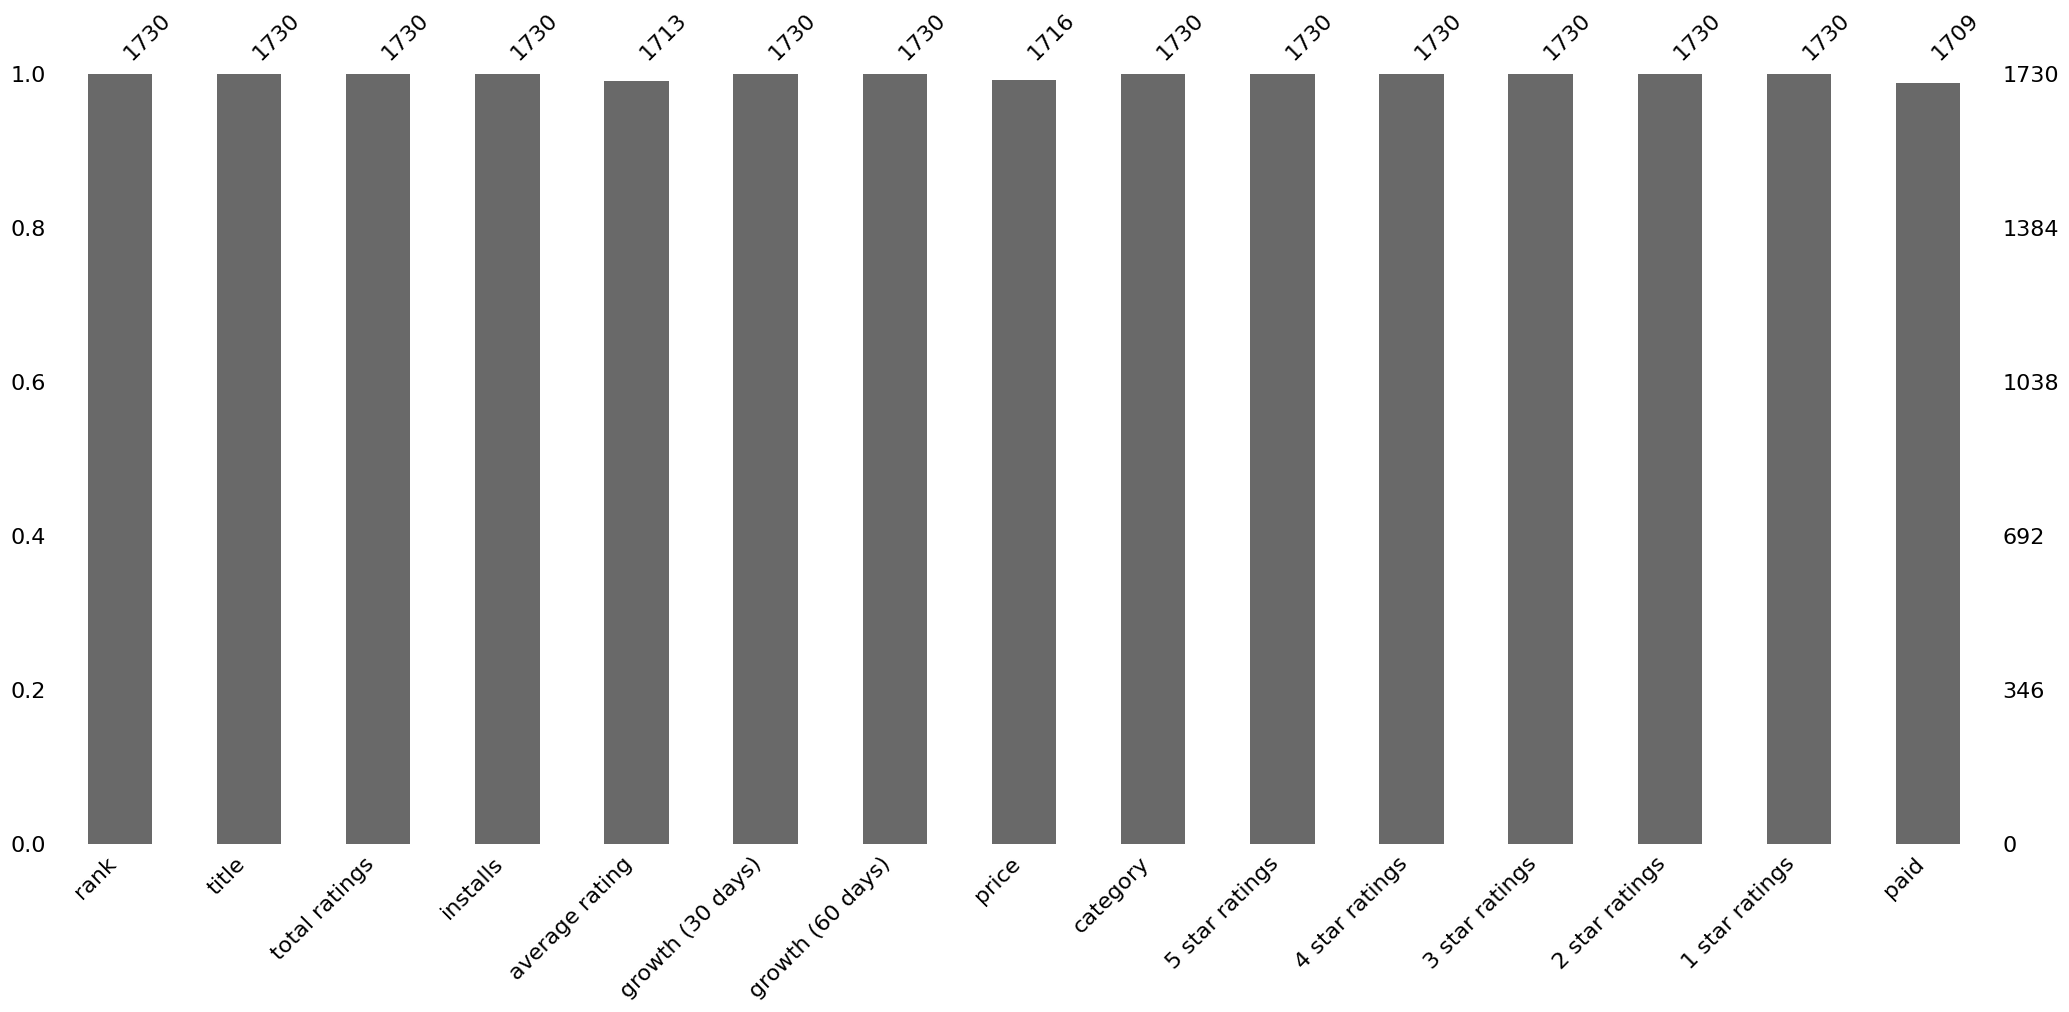

In [ ]:
#Visualizar cantidad de datos por columna
msno.bar(df);

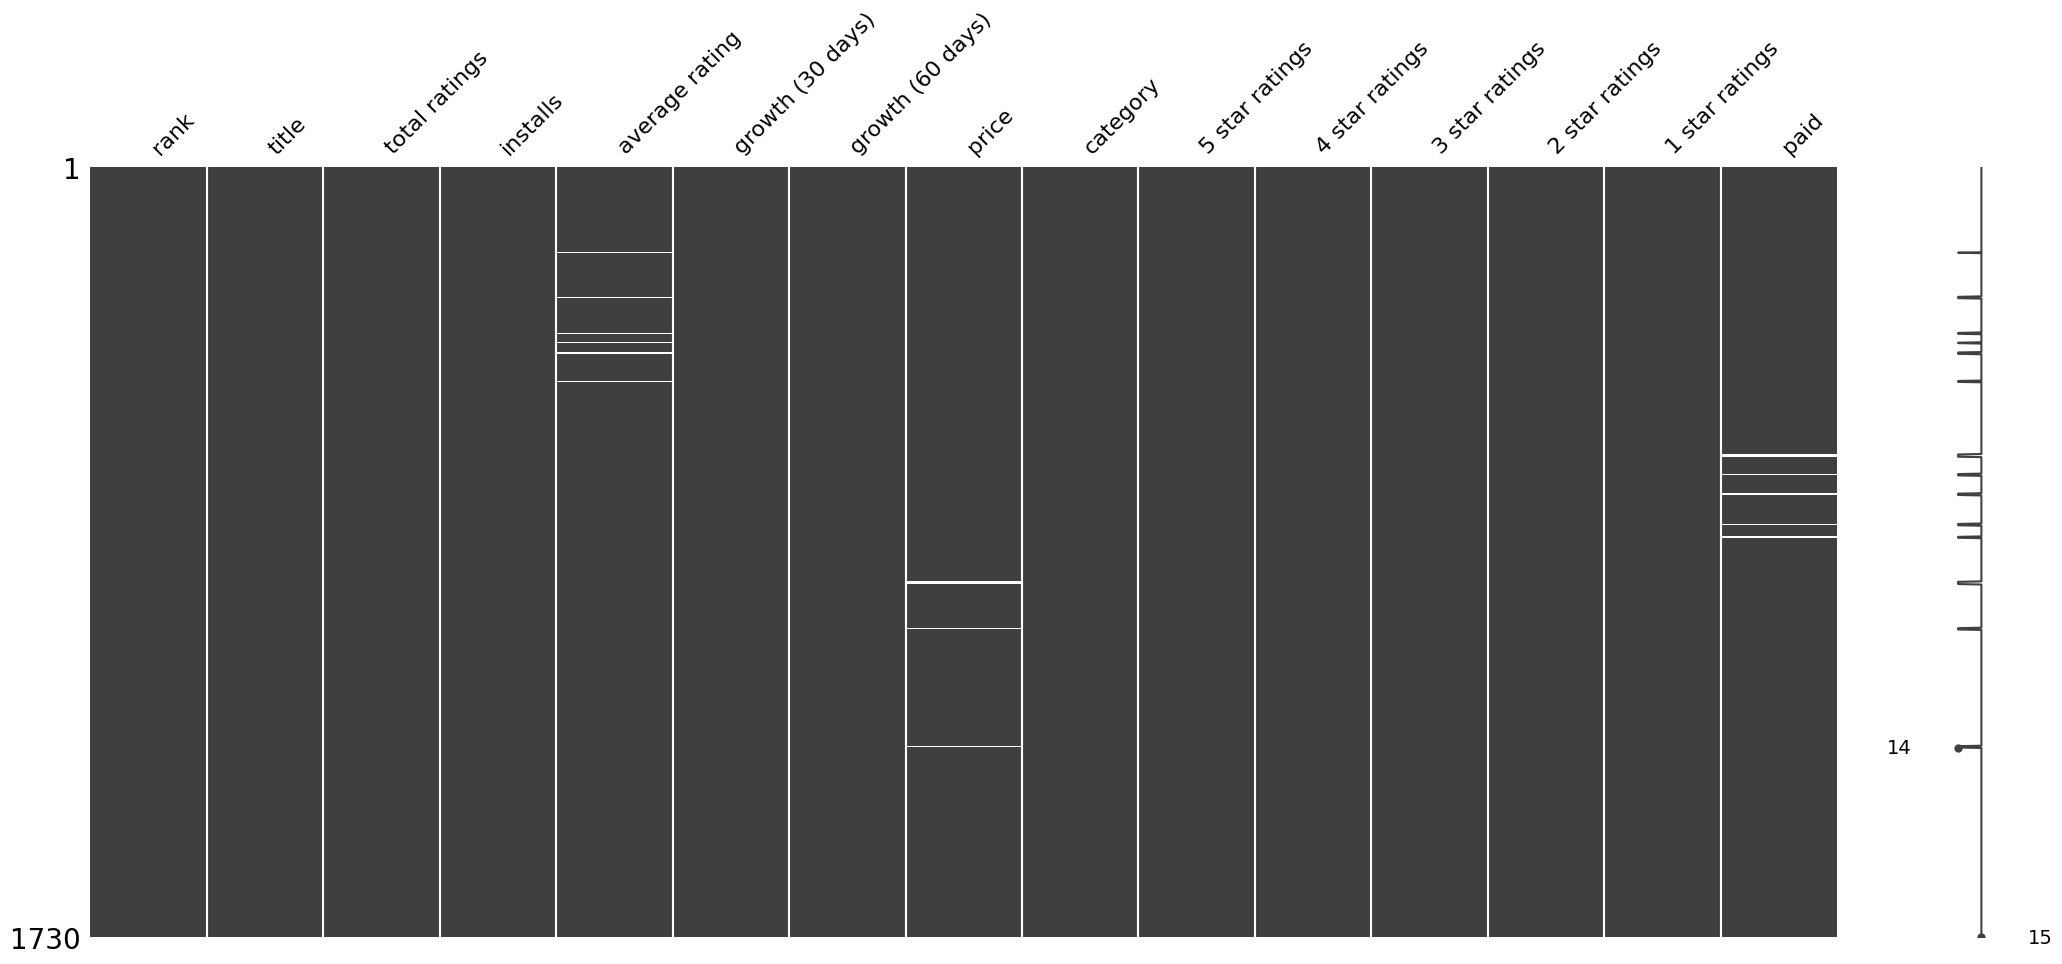

In [ ]:
msno.matrix(df);

In [ ]:
df[df.isna().any(axis=1)]

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
192,93,Draw Your Game,165363,10.0 M,NaN,0.3,0.7,0.0,GAME ADVENTURE,82072,18237,15811,10471,38770,False
291,92,Slendrina:The Cellar (Free),449205,10.0 M,NaN,0.6,1.3,0.0,GAME ARCADE,311382,35677,23861,16154,62128,False
292,93,Run Sausage Run!,448716,100.0 M,NaN,0.5,1.2,0.0,GAME ARCADE,271968,45329,35060,22824,73533,False
293,94,Human Evolution Clicker: Tap and Evolve Life F...,447522,10.0 M,NaN,990.2,0.7,0.0,GAME ARCADE,268067,58110,41935,22944,56463,False
294,95,Sky Force 2014,446946,10.0 M,NaN,0.1,0.2,0.0,GAME ARCADE,331761,57741,25895,9077,22469,False
372,73,Four In A Line Free,134398,5.0 M,NaN,0.0,0.0,0.0,GAME BOARD,82092,34320,10335,2776,4873,False
373,74,Coloring Book - Color by Number & Paint by Number,131464,10.0 M,NaN,3.2,7.0,0.0,GAME BOARD,103785,11277,5757,2467,8175,False
374,75,인생역전윷놀이,126466,1.0 M,NaN,0.1,15483.9,0.0,GAME BOARD,68210,21237,16060,4827,16130,False
394,95,Domino Qiu Qiu Online:Domino 99（QQ）,92620,1.0 M,NaN,1.3,3.6,0.0,GAME BOARD,73551,5890,4236,1963,6977,False
395,96,Dr. Gomoku,92362,5.0 M,NaN,0.1,0.1,0.0,GAME BOARD,52380,14466,8352,3196,13966,False


Vemos que falta muy poca información y esta podemos completarla para no perder los datos:

- Para la columna *average rating* podemos llenar los valores con 4, ya que como vimos en el análisis de datos la mayoría de los videojuegos en el top 100 tienen ese puntaje.

- Para la columna *paid* podemos hacer una validación ya que tenemos el precio:
  - Si el precio es 0, paid=False
  - Si el precio es >0, paid=True

- Para la columna *price* podemos hacer una validación ya que tenemos el precio:
  - Si paid=False, el precio es 0


Reemplacemos los valores Nan de *average rating* por 4:

In [ ]:
values = {"average rating": 4}
df.fillna(value=values, inplace=True)

Validemos los valores de la columna paid con los valores en la columna precio:

In [ ]:
for i in range(len(df['price'])):
  if df['price'][i] != 0:
    df['paid'][i]=True
  else:
    df['paid'][i]=False

Se truncaron las últimas líneas 5000 del resultado de transmisión.
<ipython-input-22-82e7ec5d58af>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['paid'][i]=False
<ipython-input-22-82e7ec5d58af>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['paid'][i]=False
<ipython-input-22-82e7ec5d58af>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['paid'][i]=False
<ipython-input-22-82e7ec5d58af>:5: SettingWithCopyWarning: 
A value i

Validemos los valores de la columna precio con los valores en la columna paid:

In [ ]:
df.loc[df['paid'] == True, 'price'] = 2.70
df.loc[df['paid'] == False, 'price'] = 0

In [ ]:
df.isna().sum()

rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

### Visualizaciones

Distribución del promedio de calificaciones:

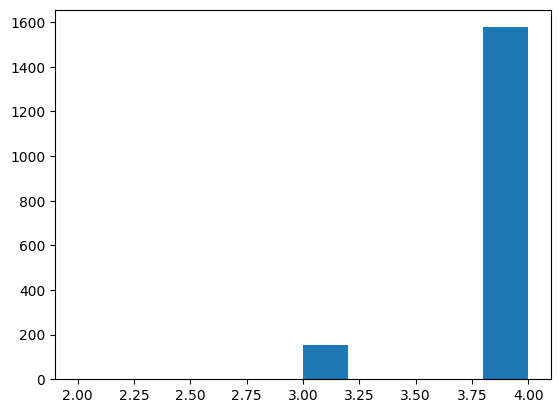

In [ ]:
plt.hist(df['average rating']);

- Gran parte de los jugos que se clasifican en el top 100 por cada categoria obtienen una puntuacion promedio de 4 estrellas.


Cantidad de videojuegos pagos y gratis:

In [ ]:


# Contar la cantidad de juegos pagados y gratuitos
juegos_pagados = df[df['paid'] == True].shape[0]
juegos_gratuitos = df[df['paid'] == False].shape[0]

# Imprimir los resultados
print(f"Cantidad de juegos pagados: {juegos_pagados}")
print(f"Cantidad de juegos gratuitos: {juegos_gratuitos}")

Cantidad de juegos pagados: 21
Cantidad de juegos gratuitos: 1709


<ipython-input-27-014ad29da223>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='paid',data=df, palette=colores);


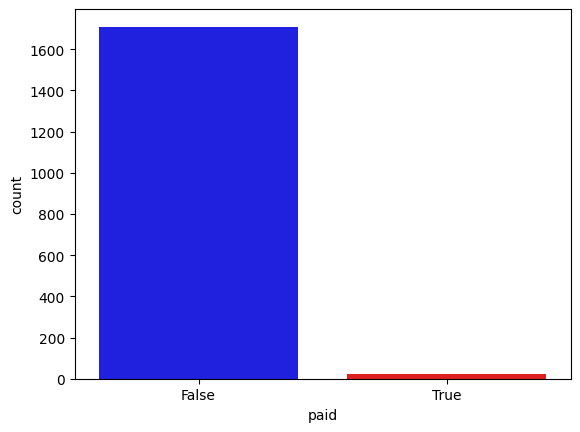

In [ ]:
colores = ['blue',  'red']
sns.countplot(x='paid',data=df, palette=colores);

##La anterior gráfica nos muestra que la gran mayoria de las descargas realizadas, tienen relacion con que son videojuegos gratuitos para su uso y de igual manera se observa un porcentaje minimo de los juegos pagados

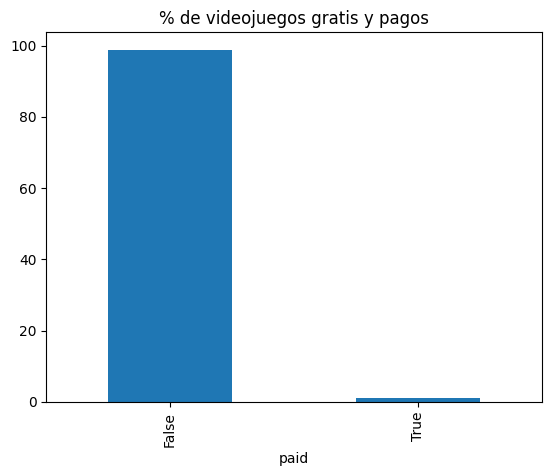

In [ ]:
plot = (100 * df['paid'].value_counts() / len(df['paid'])).plot(
kind='bar', title='% de videojuegos gratis y pagos')

- Más del 90% de los videojuegos que se encuentran en el top 100 son gratuitos. 🎮🆓

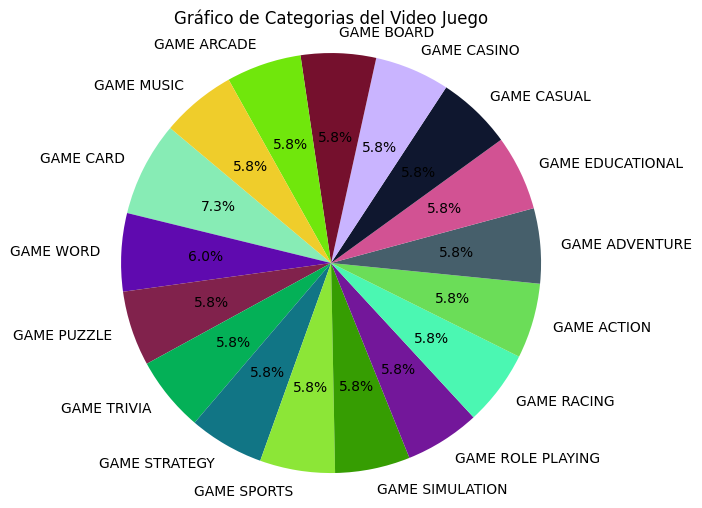

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Se revisa la frecuencia en que cada categoria se muestra
conteo_frecuencia = df['category'].value_counts()

# Extraer los nombres de los atributos y sus conteos
nombres_etiquetas = conteo_frecuencia.index.tolist()
conteos = conteo_frecuencia.values

# Generar colores aleatorios
num_colores = len(nombres_etiquetas)
colores_aleatorios = ['#%06X' % np.random.randint(0, 0xFFFFFF) for _ in range(num_colores)]

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(conteos, labels=nombres_etiquetas, colors=colores_aleatorios, autopct='%1.1f%%', startangle=140)

# Añadir título
plt.title('Gráfico de Categorias del Video Juego')

# Mostrar el gráfico
plt.axis('equal')  # asegura que el gráfico sea circular
plt.show()



##La anterior gráfica muestra el porcentaje de participacion de acuerdo a lacategoria del video juego, sin embargo se puede observar que existe una gran variedad en el mercado

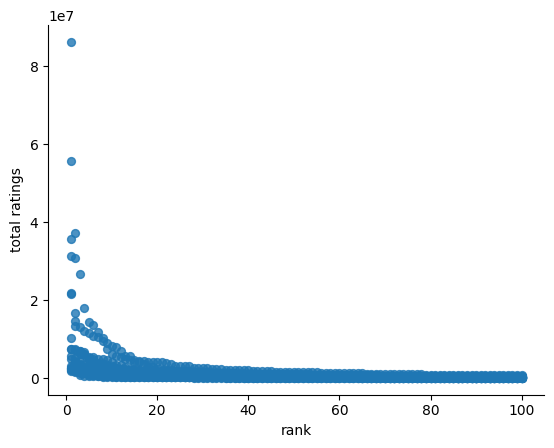

In [ ]:
# @title rank vs total ratings

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='rank', y='total ratings', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

### Descriptivas

Descripción de variables categóricas:

In [ ]:
df.describe(include='O')

,title,installs,category,paid
count,1730,1730,1730,1730
unique,1675,9,17,2
top,Solitaire,10.0 M,GAME CARD,False
freq,36,805,126,1709


- El videojuego que aparece más veces en el top es Solitaire.
- La variable *installs* es categórica.


Valores únicos de las Categorías:


In [ ]:
df['category'].unique()

array(['GAME ACTION', 'GAME ADVENTURE', 'GAME ARCADE', 'GAME BOARD',
       'GAME CARD', 'GAME CASINO', 'GAME CASUAL', 'GAME EDUCATIONAL',
       'GAME MUSIC', 'GAME PUZZLE', 'GAME RACING', 'GAME ROLE PLAYING',
       'GAME SIMULATION', 'GAME SPORTS', 'GAME STRATEGY', 'GAME TRIVIA',
       'GAME WORD'], dtype=object)

In [ ]:
df['installs'].unique()

array(['500.0 M', '100.0 M', '50.0 M', '10.0 M', '5.0 M', '1.0 M',
       '1000.0 M', '500.0 k', '100.0 k'], dtype=object)

- Los valores contienen letras que indican:

  *   M: *1000000
  *   k: *1000

##Proceso de conexión a la base de datos en linea

In [ ]:
!pip install mysql-connector_python

Antes de realizar el cargue de datos, se crea la base de datos con el siguiente comando SQL:



```

create table gestion(rank int not null,
                     title varchar(500) not null,
                     total_ratings int not null,
                     installs varchar(500) not null,
                     average_rating int not null,
                     growth_30_days float not null,
                     growth_60_days float not null,
                     price float not null,
                     category varchar(500) not null,
                     star_ratings_5 int not null,
                     star_ratings_4 int not null,
                     star_ratings_3 int not null,
                     star_ratings_2 int not null,
                     star_ratings_1 int not null,
                     paid bit not null )
```


In [ ]:
import mysql.connector

conexion = mysql.connector.connect(
    host = "sql10.freesqldatabase.com",
    user = "sql10700267",
    passwd = "efEavvyeX3",
    database = "sql10700267"
)



if conexion.is_connected():
    print("Conexión establecida con éxito.")
    # Realiza aquí tus operaciones con la base de datos
    cursor = conexion.cursor()

    # Consulta para seleccionar todos los datos de una tabla
    for fila in df.itertuples(index=False):
        consulta = """
            INSERT INTO gestion
            (rank,
            title,
            total_ratings,
            installs,
            average_rating,
            growth_30_days,
            growth_60_days,
            price,
            category,
            star_ratings_5,
            star_ratings_4,
            star_ratings_3,
            star_ratings_2,
            star_ratings_1,
            paid)
            VALUES
            (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,%s, %s, %s)
        """


        cursor.execute(consulta, fila)




        # Confirmar los cambios
        conexion.commit()
    # Cerrar cursor y conexión
    cursor.close()
    conexion.close()
else:
    print("No se pudo establecer conexión.")

Conexión establecida con éxito.
